# Grover's Algorithm

This is an incredibly simplistic implementation of [Grover's Algorithm](https://en.wikipedia.org/wiki/Grover's_algorithm) on a two qubit circuit.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram

Prepare a quantum circuit with two qubits:

In [18]:
numQubits = 2
grovCircuit = QuantumCircuit(numQubits)

Create a helper function to initialize the state `|s>` for an arbitrary amount of qubits and then initialize the two qubit circuit

In [19]:
def init_s(circ, qubits):
  for q in qubits:
    circ.h(q)
  return circ

grovCircuit = init_s(grovCircuit, [0,1])
grovCircuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

This implmentation is looking specifically for the `|11>` state so the oracle will be a cz gate

In [20]:
grovCircuit.cz(0,1)
grovCircuit.draw()

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘

Now the diffuser is applied for amplitude amplification

In [21]:
grovCircuit.h([0,1])
grovCircuit.z([0,1])
grovCircuit.cz(0,1)
grovCircuit.h([0,1])
grovCircuit.draw()

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

This is the completed circuit. Now a simulation can be run to show the resulting state

In [22]:
sim = Aer.get_backend('aer_simulator')
grover_circuit_sim = grovCircuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()
from qiskit_textbook.tools import vector2latex

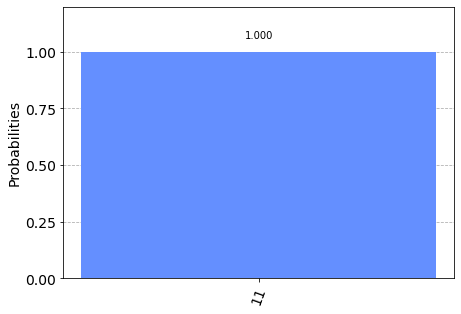

In [23]:
grovCircuit.measure_all()
aerSim = Aer.aer.get_backend('aer_simulator')
qObj = assemble(grovCircuit)
result = aerSim.run(qObj).result()
counts = result.get_counts()
plot_histogram(counts)

The amplitude of all states except `|11>` is 0 meaning the is a %100 change of the desired state (at least in the simulation)

In [24]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'